### Credit Card Fraud Detection

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

# PART 1: DATA CLEANING

In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

The first thing we do is to load and read all the data

In [75]:
creditcard_train_df = pd.read_csv("creditcard_train.csv")
creditcard_train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


In [76]:
null_percentage = creditcard_train_df.isnull().mean() * 100

null_summary = pd.DataFrame({'Null Percentage': null_percentage})  

print("Summary of Null Values:")
print(null_summary)

Summary of Null Values:
        Null Percentage
Time           0.000000
V1             0.000000
V2             0.000000
V3             0.000000
V4             0.000000
V5             0.000000
V6             0.000000
V7             0.000000
V8             0.000000
V9             0.000000
V10            0.000000
V11            0.000000
V12            0.000000
V13            0.000000
V14            0.000000
V15            0.000000
V16            0.000000
V17            0.000000
V18            0.000000
V19            0.000000
V20            0.000000
V21            0.000000
V22            0.097661
V23            0.182676
V24            0.000000
V25            0.000000
V26            0.000000
V27            0.000000
V28            0.000000
Amount         0.000000
Class          0.000000


##### Why We Don't Want Null Values in the Dataset?

As you can see, the original data still has several null values particulary in several columns such as V23 and V24. Hence, we have to either drop those null values or do the imputting method. But I didn't do the dropping rows with null values can significantly reduce the overall dataset, especially if null values are common, potentially losing valuable information and patterns. Instead, imputting the null values with mean of the data.

In [77]:
cc_train_clean = creditcard_train_df.fillna(creditcard_train_df.mean())

cc_train_clean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


Now, we recheck whether the data still contains null values or not. In this case, I have summarize all the columns that are null, and the result shows that all columns has no more null values. 

In [78]:
print("Summary of Null Values:")
cc_train_clean.isnull().sum()

Summary of Null Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [79]:
cc_train_clean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725575,0.624481,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542399,-0.161824,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.006781,-0.011178,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.528527,0.147642,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


The describe method gives a comprehensive initial assessment of the data. As we can see, time and amount feature are not scaled. Hence, we can do a standard scaler later on. 

In [80]:
print('No Frauds', round(cc_train_clean['Class'].value_counts()[0]/len(cc_train_clean) * 100,2), '% of the dataset')
print('Frauds', round(cc_train_clean['Class'].value_counts()[1]/len(cc_train_clean) * 100,2), '% of the dataset')
print('Fraudulent Transactions', cc_train_clean['Class'].value_counts()[1])

No Frauds 99.84 % of the dataset
Frauds 0.16 % of the dataset
Fraudulent Transactions 442


We also found out that the data is highly imbalance. The classes are heavily skewed. most of transactions are not fraud. if we use this data as train data. the model will be overfit and assume all transactions is not fraud. By seeing the distributions, we can have an idea how skewed the data it is.

[[Text(0, 0, 'Non Fraud'), Text(1, 0, 'Fraud')]]

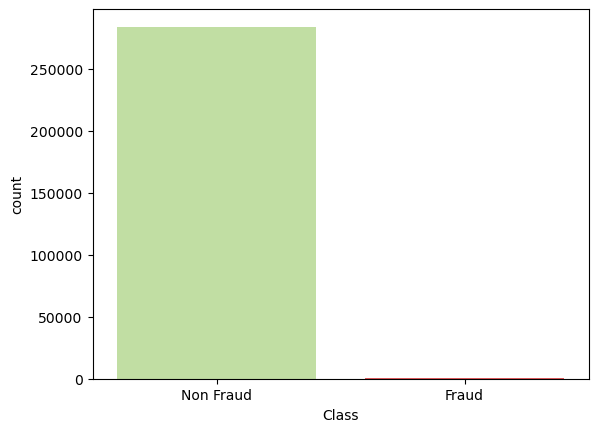

In [81]:
import seaborn as sns

colors = ["#C1E899", "#F94449"]

plot = sns.countplot(x='Class', data=cc_train_clean, palette=colors)
plot.set(xticklabels=["Non Fraud", "Fraud"])

#### Why Scaling?

Here we do scaling for the column "Amount" and "Time". Without scaling, features with larger ranges could dominate the distance calculations used in algorithms, particularly those that rely on calculating distances. In addition, Scaling ensures that all features are treated similarly, providing a more uniform basis for evaluating distances or margins within the model.

In [82]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_cc_train_clean = cc_train_clean.copy()

scaled_cc_train_clean['scaled_amount'] = min_max_scaler.fit_transform(scaled_cc_train_clean['Amount'].values.reshape(-1,1))
scaled_cc_train_clean['scaled_time'] = min_max_scaler.fit_transform(scaled_cc_train_clean['Time'].values.reshape(-1,1))

scaled_cc_train_clean.drop(['Time','Amount'], axis=1, inplace=True)

scaled_cc_train_clean

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,0.000030,0.999965
284653,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.000965,0.999971
284654,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,0,0.002642,0.999977
284655,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,0,0.000389,0.999977


Since the data was imbalanced, we will create the train data with a 50:50 ratio. Since there is 442 fraud transactions, So we can concat with 442 non-fraud transactions. Since the dataset has 99.86% non-fraud and only 0.16% fraud transactions, a model could achieve high accuracy by simply predicting 'no fraud' for every transaction, but it would be ineffective at detecting actual fraud. By addressing class imbalance, you can enhance model performance, reduce bias, and ensure that the model is capable of accurately identifying instances of both classes.

Distribution of the Classes in the subsample dataset
Class
1    0.5
0    0.5
Name: count, dtype: float64


Text(0.5, 1.0, 'Distribution of the Classes in the balanced_scaled_cc_train_clean dataset')

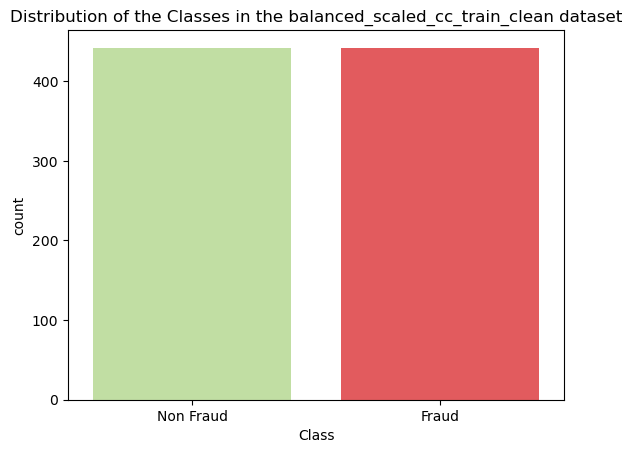

In [83]:
balanced_scaled_cc_train_clean = scaled_cc_train_clean.sample(frac=1)

fraud_data = balanced_scaled_cc_train_clean.loc[balanced_scaled_cc_train_clean['Class']==1]
nfraud_data = balanced_scaled_cc_train_clean.loc[balanced_scaled_cc_train_clean['Class']==0][:442]

balanced_scaled_cc_train_clean = pd.concat([fraud_data, nfraud_data])

balanced_scaled_cc_train_clean.sample(frac=1, random_state=42)

print('Distribution of the Classes in the subsample dataset')
print(balanced_scaled_cc_train_clean['Class'].value_counts()/len(balanced_scaled_cc_train_clean))

plot = sns.countplot(x='Class', data=balanced_scaled_cc_train_clean, palette=colors)
plot.set(xticklabels=["Non Fraud", "Fraud"])
plot.set_title('Distribution of the Classes in the balanced_scaled_cc_train_clean dataset')

/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/1380461629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/1380461629.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_v

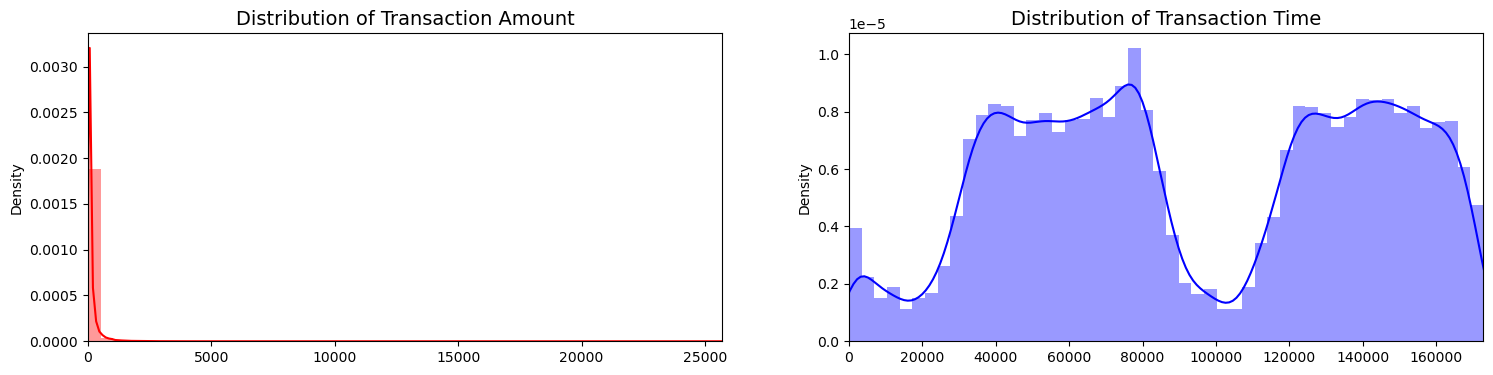

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc_train_clean['Amount'].values
time_val = cc_train_clean['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

#### What is important from this Visualization?

From the Left Graph:
- Right-Skewed Distribution: The distribution is highly right-skewed, meaning that most transactions are at the lower end of the spectrum (i.e., below $5,000).

- Few High-Value Transactions: There are very few transactions with significantly higher amounts, which can indicate that fraud attempts may target high-value transactions, albeit they are rare.


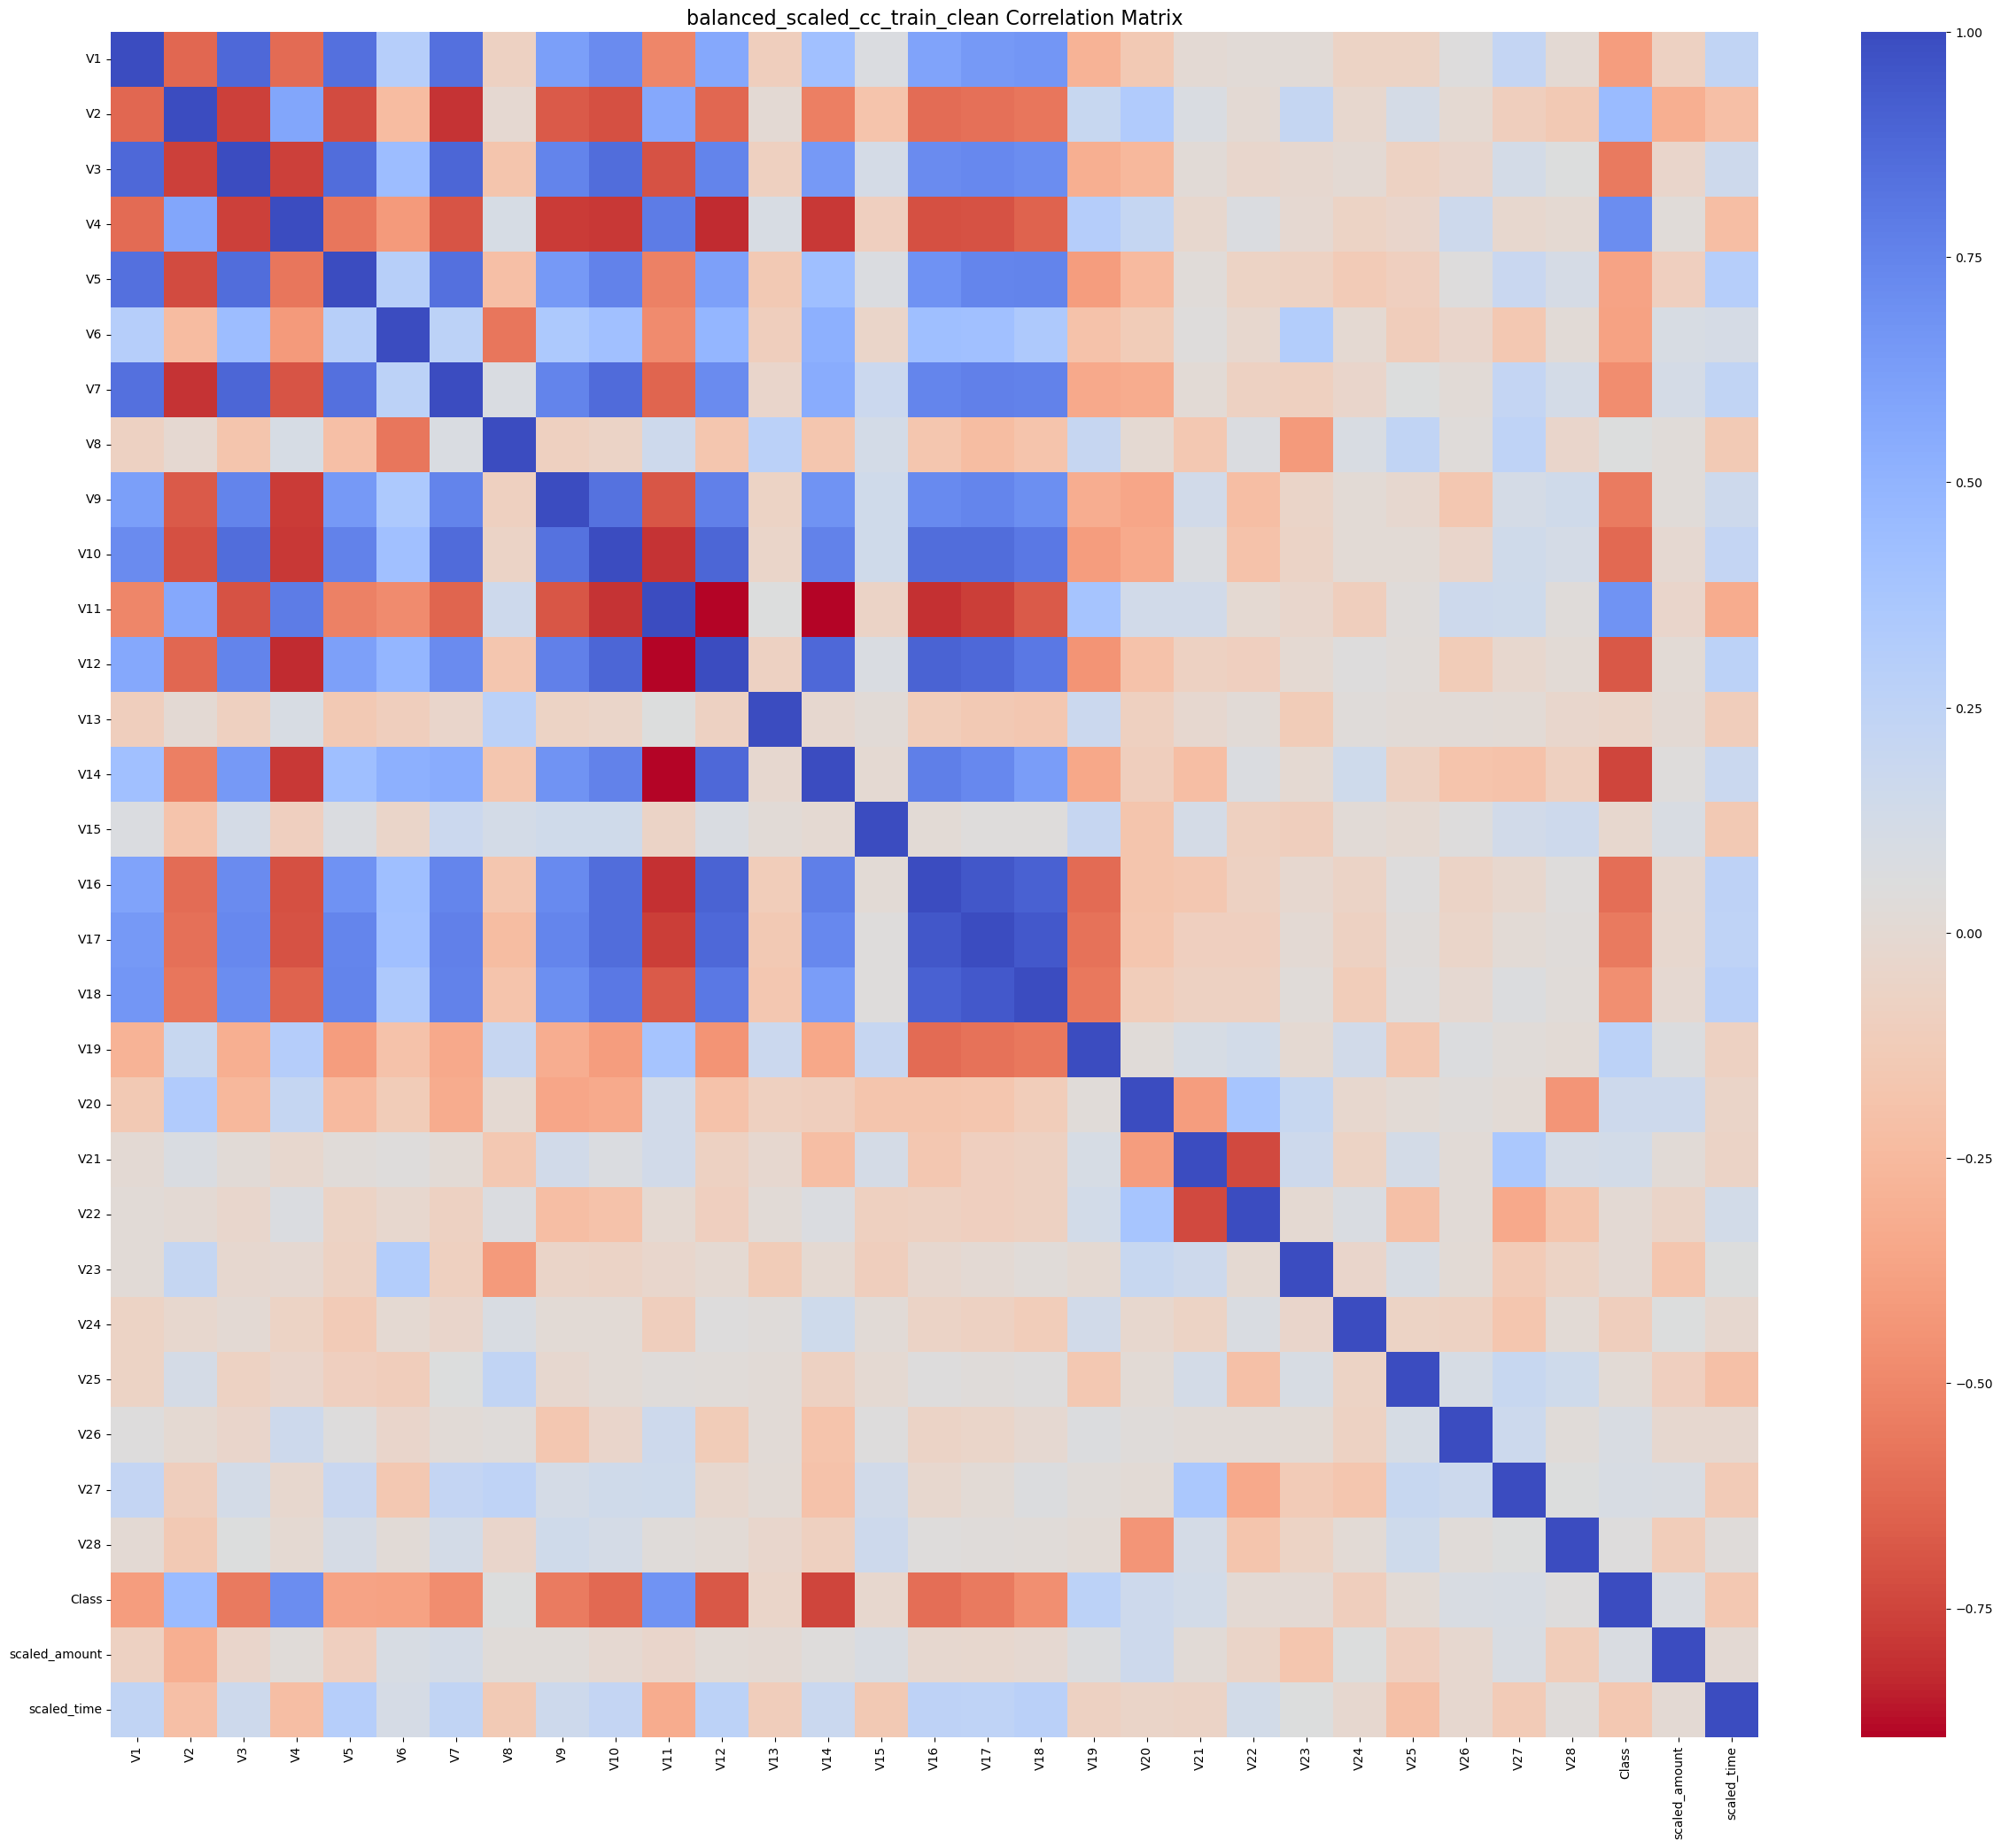

In [85]:
f, ax2 = plt.subplots(figsize=(30,25))

sub_sample_corr = balanced_scaled_cc_train_clean.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':25}, ax=ax2)
ax2.set_title('balanced_scaled_cc_train_clean Correlation Matrix', fontsize=16)
plt.show()

#### Understanding the Correlation Matrix:

- Color Scaling:

Blue Shades: Indicate positive correlations. As the value of one feature increases, so does the likelihood of the modeled outcome (in this case, fraud).

Red Shades: Indicate negative correlations. As the value of one feature increases, the likelihood of the modeled outcome decreases.

- Key Relationships: Focus on the cells that correlate with the "Class" feature:

High Positive Correlation: Features like V2, V11, V4, and V10 may exhibit strong positive correlations with "Class," indicating these features could be significant predictors of fraud.

High Negative Correlation: Features such as V3, V5, V6, V7, V9, V10, V12, V14, V17 might show negative correlations, suggesting that increases in these features are associated with a reduced likelihood of fraud.

Strongly correlated features (both positively and negatively) can inform decisions about which features to include in predictive models. Features with significant correlations to the outcome (fraud) are often prioritized.


In [86]:
features = [
    'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
    'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'scaled_amount'
]

/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/2930861319.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_data, ax=axes[idx], fit=norm, color=color)
/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/2930861319.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

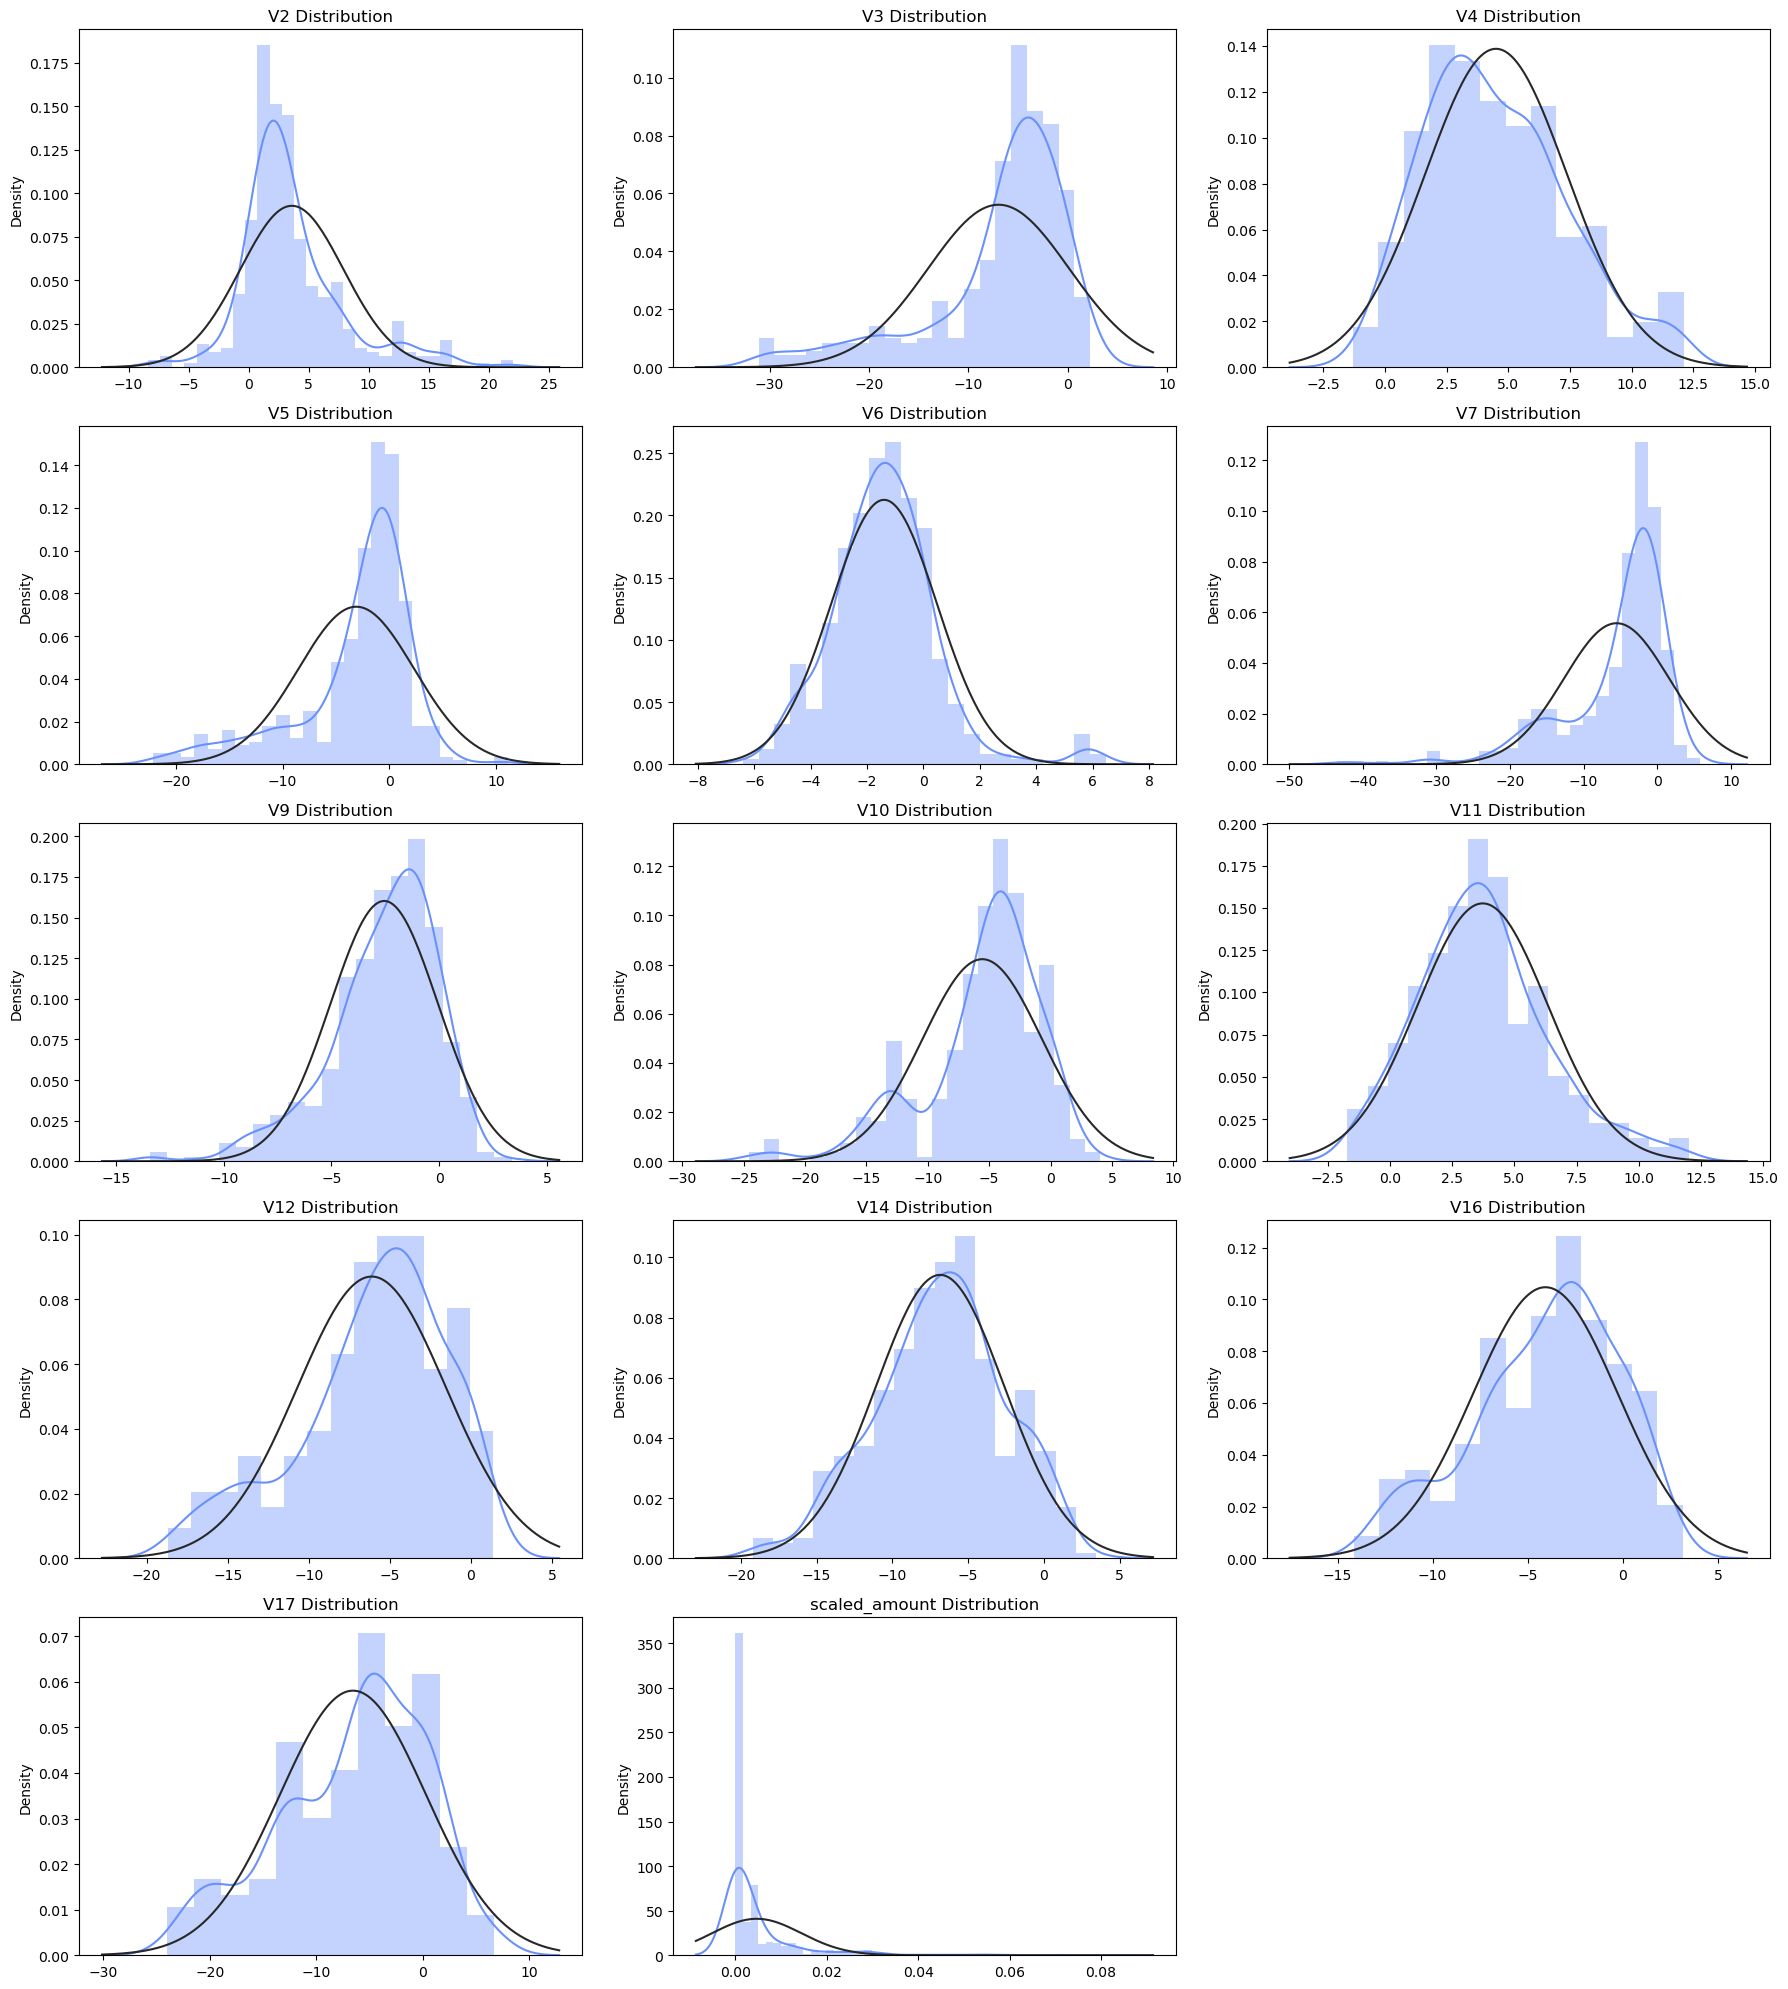

In [87]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(data, feature_columns, target_column='Class', target_value=1, color='#FB8861'):

    num_features = len(feature_columns)
    num_cols = 3
    num_rows = -(-num_features // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
    axes = axes.flatten()

    for idx, feature in enumerate(feature_columns):
        feature_data = data[feature].loc[data[target_column] == target_value].values
        sns.distplot(feature_data, ax=axes[idx], fit=norm, color=color)
        axes[idx].set_title(f'{feature} Distribution', fontsize=12)

    # Hide unused subplots
    for idx in range(len(feature_columns), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_feature_distributions(
    data=balanced_scaled_cc_train_clean,
    feature_columns=features,
    target_column='Class',
    target_value=1,
    color= '#6A91FB'
)

Using a standard deviation to determine how many outlier in train data, by removing the outlier it can improve the undestanding of model to determine the fraud or non-fraud transactions.

In [88]:
def remove_outlier(df, feature):
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df


new_cc_train = balanced_scaled_cc_train_clean.copy()


for column in features:
    new_cc_train = remove_outlier(new_cc_train, column)

new_cc_train

print("Before removing outlier : {} row(s)".format(len(balanced_scaled_cc_train_clean.index)))
print("After removing outlier : {} row(s)".format(len(new_cc_train.index)))

Before removing outlier : 884 row(s)
After removing outlier : 660 row(s)


In [89]:
new_cc_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
33250,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,1,0.000479,0.215097
222010,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,-1.775833,-3.754054,...,0.893065,1.034907,0.097671,-1.345551,-0.788329,1.055442,0.099971,1,0.005636,0.826659
249696,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677763,-3.447596,-4.707571,...,-0.941384,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,1,0.000262,0.894712
147457,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,-3.936294,...,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1,0.000046,0.513172
203962,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802052,-0.989431,...,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1,0.004224,0.781876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138961,1.142045,0.722442,0.766934,3.435888,0.421386,0.843465,-0.094431,0.183169,-1.175544,1.132683,...,-0.392888,0.010474,-0.814061,0.321371,-0.054724,0.019812,0.022928,0,0.000214,0.480242
264818,0.041049,0.876362,0.266650,-0.611933,0.490836,-0.990040,1.021267,-0.193668,-0.083914,-0.428744,...,-0.537785,0.066274,-0.083191,-0.485197,0.146816,0.251816,0.096753,0,0.000166,0.935622
26811,-2.762282,-1.107713,0.963707,0.300158,1.337561,-0.768302,-1.094898,1.080124,0.275344,-1.429499,...,-0.166587,-0.403722,-0.396415,0.533478,0.589041,0.176657,-0.258835,0,0.000467,0.198343
266048,0.097479,0.983355,-0.331622,-0.626560,0.884939,-0.589613,0.868192,0.036333,-0.292154,-0.661356,...,-0.711355,0.100441,0.656285,-0.474139,0.087188,0.217782,0.075075,0,0.000127,0.938857


Outlier detection and removal are essential steps in data preprocessing, as outliers can skew results and lead to inaccurate model predictions. The statistical method for identifying outliers that we use is based on percentiles and the Interquartile Range (IQR). After calculating the bounds, it becomes straightforward to identify outliers in the dataset. This step is crucial as outliers can distort the results of various analyses and predictive models.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

After We have cleaned again the data by basing on percentiles and Interquartile Range. The graphs below is the result after removing the outliers on speicific columns. By analyzing the distributions of the features, we observe that certain features, like V4 and V10, show skewed distributions, which could indicate that fraud tends to occur at higher values in those features. Meanwhile, other features, like V17, follow a more balanced distribution for fraudulent cases.

Additionally, removing outliers using standard deviation can lead to better insights by focusing the model on more typical fraud patterns and reducing the effect of extreme data points. This could help improve the accuracy and robustness of the fraud detection model, enabling it to more effectively classify transactions as fraud or non-fraud.

/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/2930861319.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_data, ax=axes[idx], fit=norm, color=color)
/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/2930861319.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

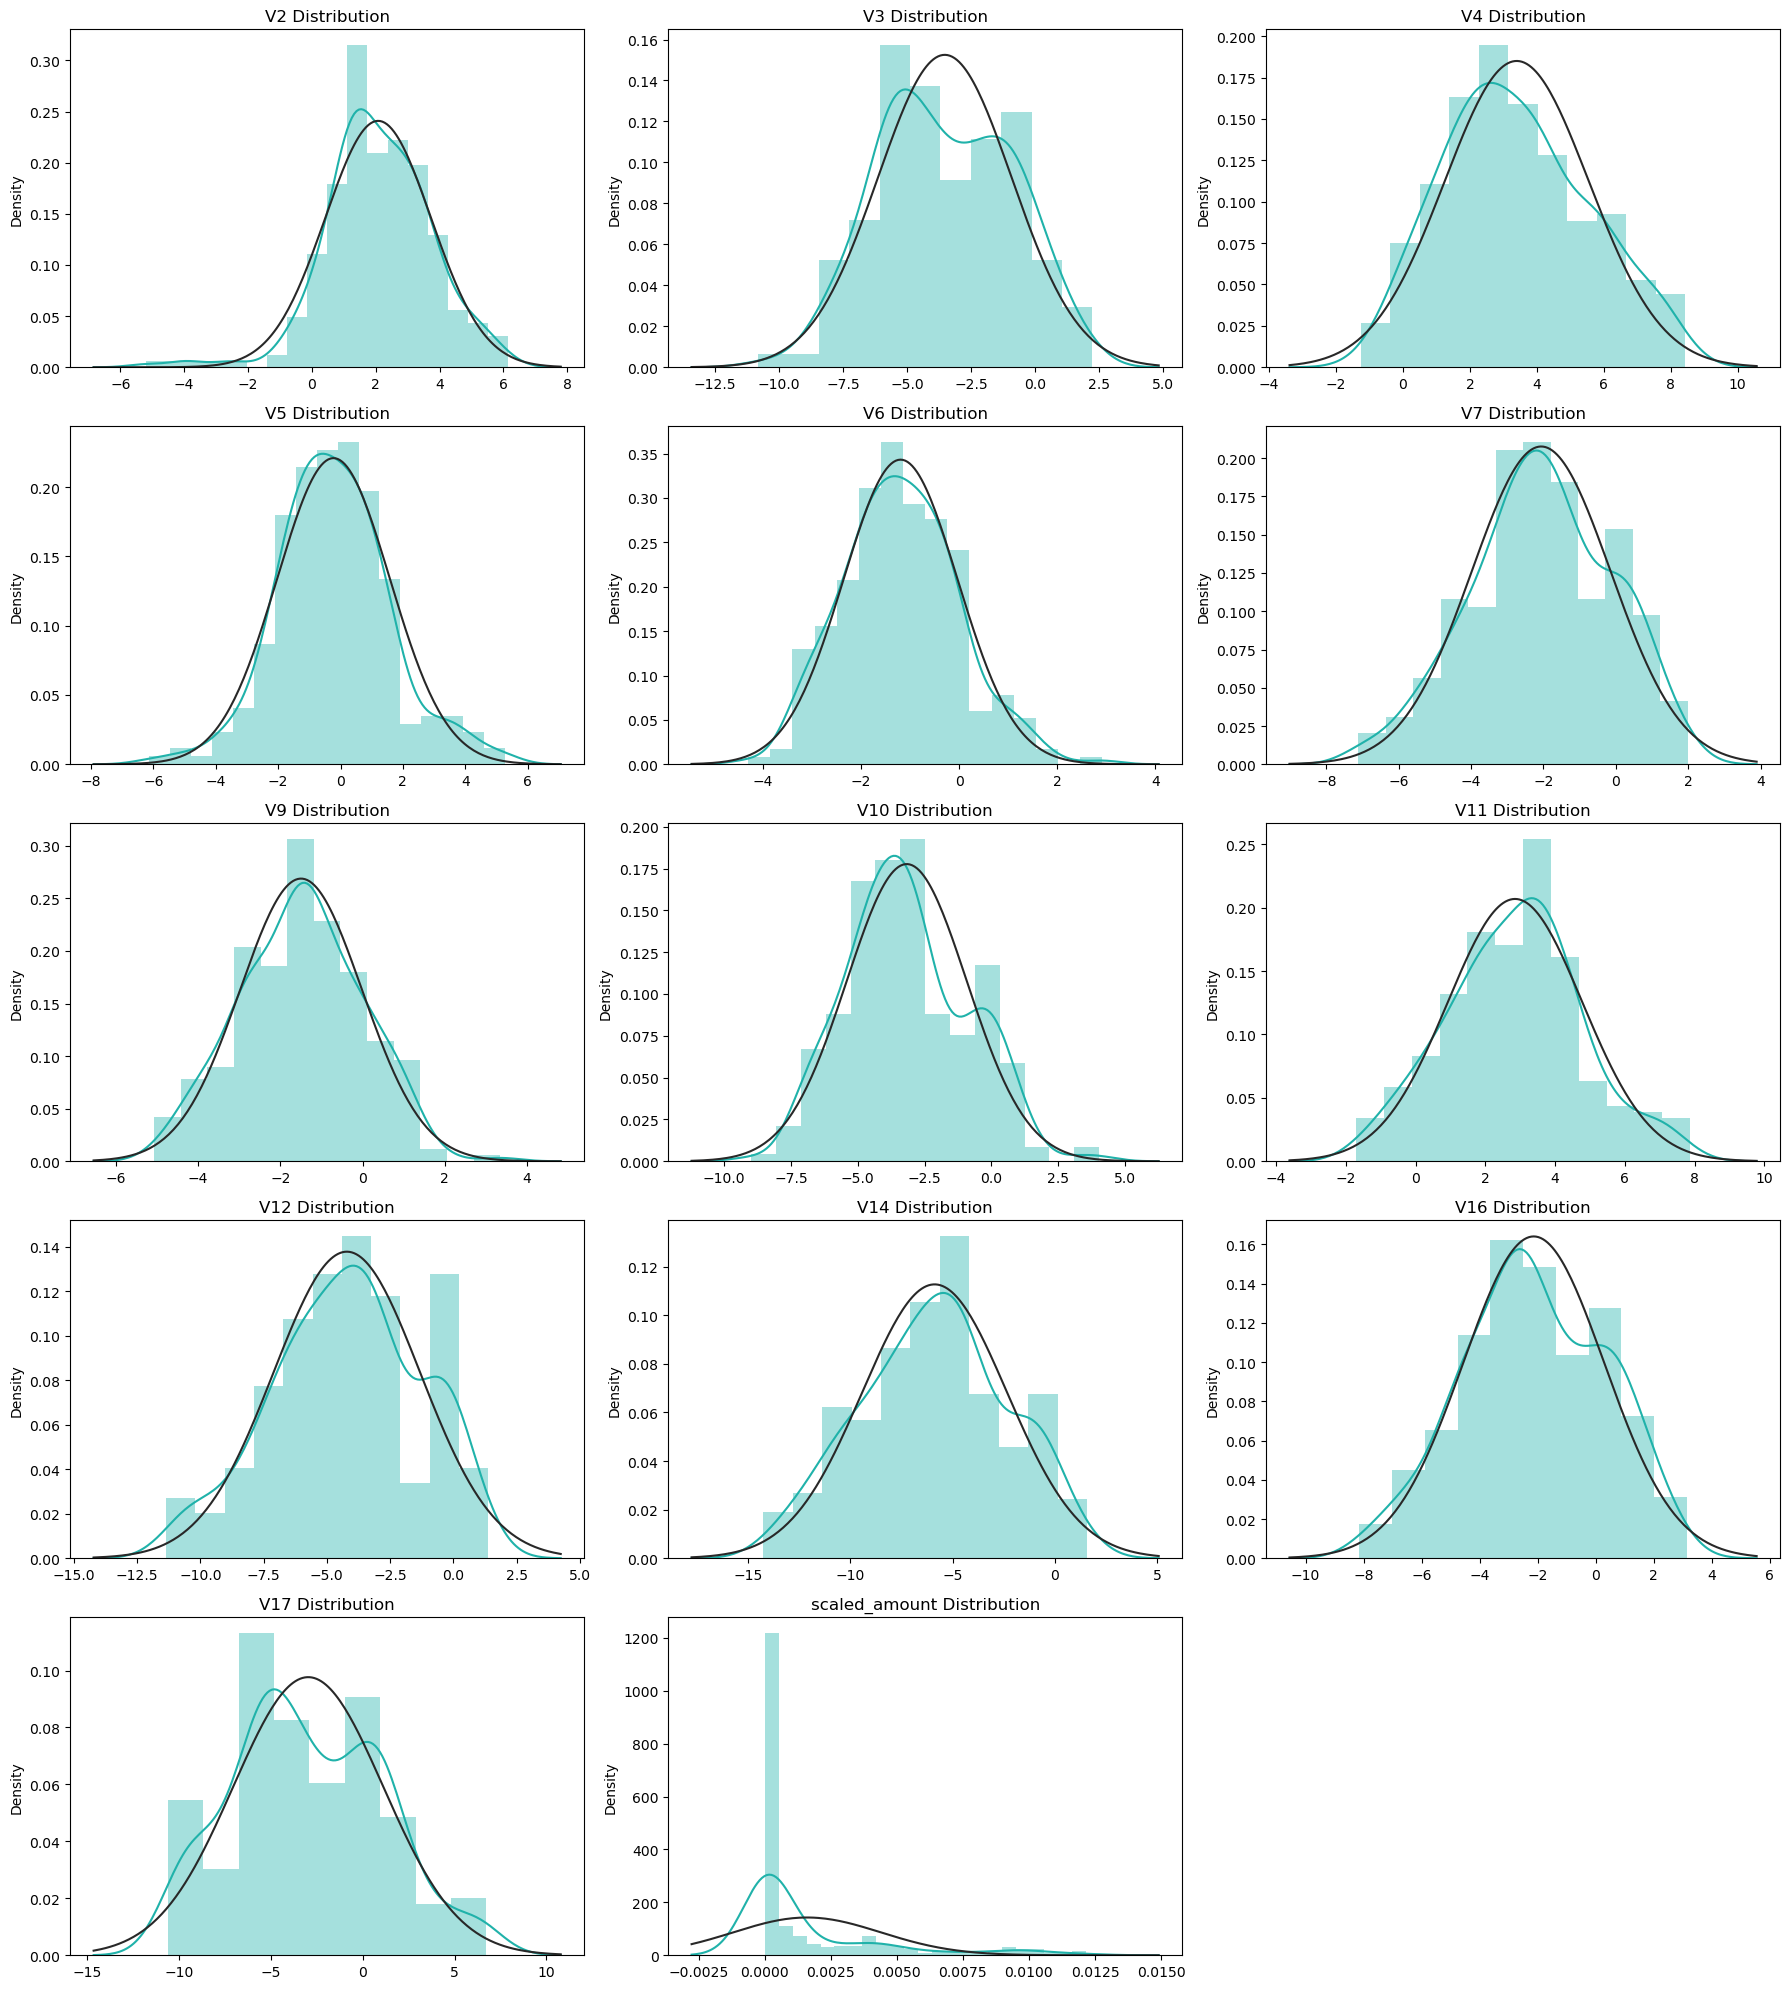

In [90]:
from scipy.stats import norm

plot_feature_distributions(
    data=new_cc_train,
    feature_columns=features,
    target_column='Class',
    target_value=1,
    color='lightseagreen'
)

The graph above is the result after outliers were removed. As a result, the distribution now closely resembles a bell curve, indicating a more normalized and representative shape. This adjustment enhances the clarity of the data trends, allowing for better analysis and interpretation of the underlying patterns.

/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/1344278396.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 0]['scaled_time'],
/var/folders/dd/yyh5r6b12kq1lzrbmpsg9nd40000gn/T/ipykernel_41218/1344278396.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 1]['scaled_time'],


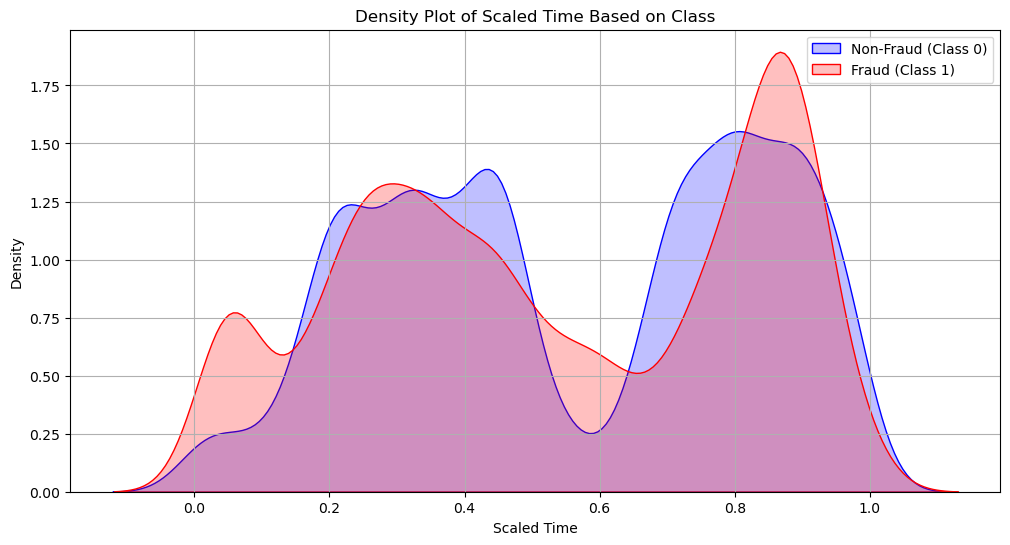

In [97]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 0]['scaled_time'], 
             shade=True, color='blue', label='Non-Fraud (Class 0)', bw_adjust=0.5)

sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 1]['scaled_time'], 
             shade=True, color='red', label='Fraud (Class 1)', bw_adjust=0.5)

plt.title('Density Plot of Scaled Time Based on Class')
plt.xlabel('Scaled Time')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

From the above graph, we can see that fraud transactions have more peaks that can be identified. The red curve for fraud shows one or more significant peaks at certain intervals of scaled_time, suggesting that there are specific periods when fraudulent activities are more common. However, it is important to note that time should not be the main feature investigated further when detecting fraud. As there are several times where the fraud and non fraud overlaps one another.

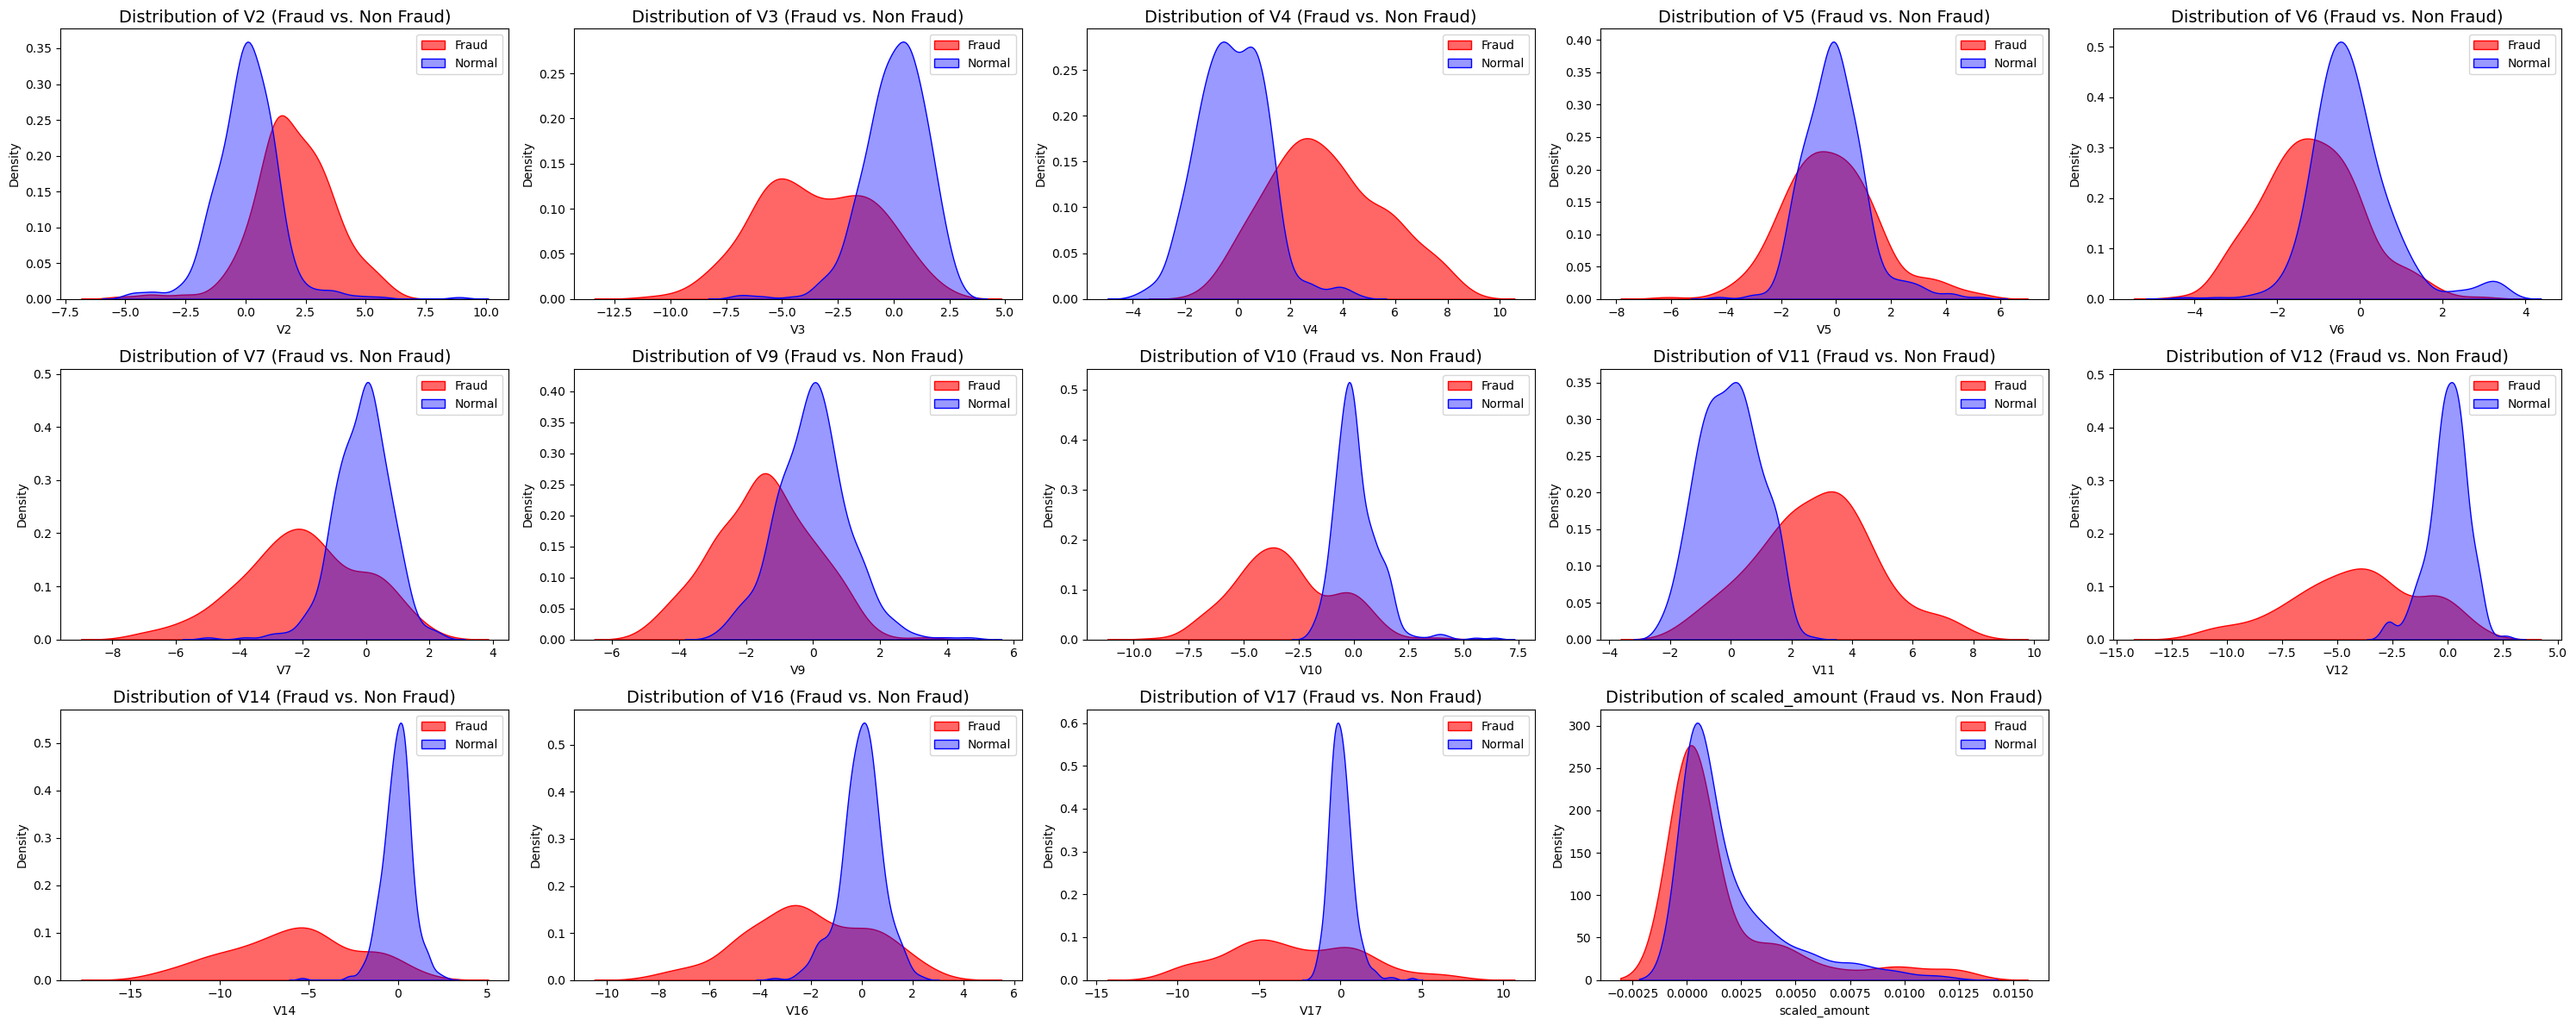

In [40]:
import math

num_cols = 5
num_rows = math.ceil(len(features) / num_cols)

f, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
ax = ax.flatten()

for i, var in enumerate(features):
    sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 1][var],
                label="Fraud", color="red", ax=ax[i], fill=True, alpha=0.6)
    sns.kdeplot(data=new_cc_train[new_cc_train['Class'] == 0][var],
                label="Normal", color="blue", ax=ax[i], fill=True, alpha=0.4)
    ax[i].set_title(f"Distribution of {var} (Fraud vs. Non Fraud)", fontsize=14)
    ax[i].legend()

for j in range(len(features), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

Based the density plots, we can summarize some characteristics of fraud transactions as follows: <br>

V4: Fraud transactions tend to have higher values, suggesting that elevated measurements in V4 may indicate potential fraudulent activity. <br>

V5: The distributions are quite distinct, especially in the negative range. Fraud is far more likely with lower values of V5. The density plot for V5 shows a significantly higher concentration of fraudulent transactions in the negative range compared to non-fraudulent transactions, strongly indicating that low V5 values are highly suggestive of fraud.

V10: Fraud transactions cluster more at lower values compared to normal transactions, highlighting a tendency for fraudulent activity to occur at these reduced levels. <br>

V12: The distribution for fraud is skewed towards smaller values, implying that lower values in V12 might be associated with fraudulent behavior. <br>

V14: Similar to V12, fraud transactions have predominantly negative values, indicating that negative values in V14 could signal fraud. <br>

V17: There’s a clear separation in the distributions, with fraud cases concentrated at lower values, providing a distinct characteristic that can aid in differentiating between fraud and non-fraud.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

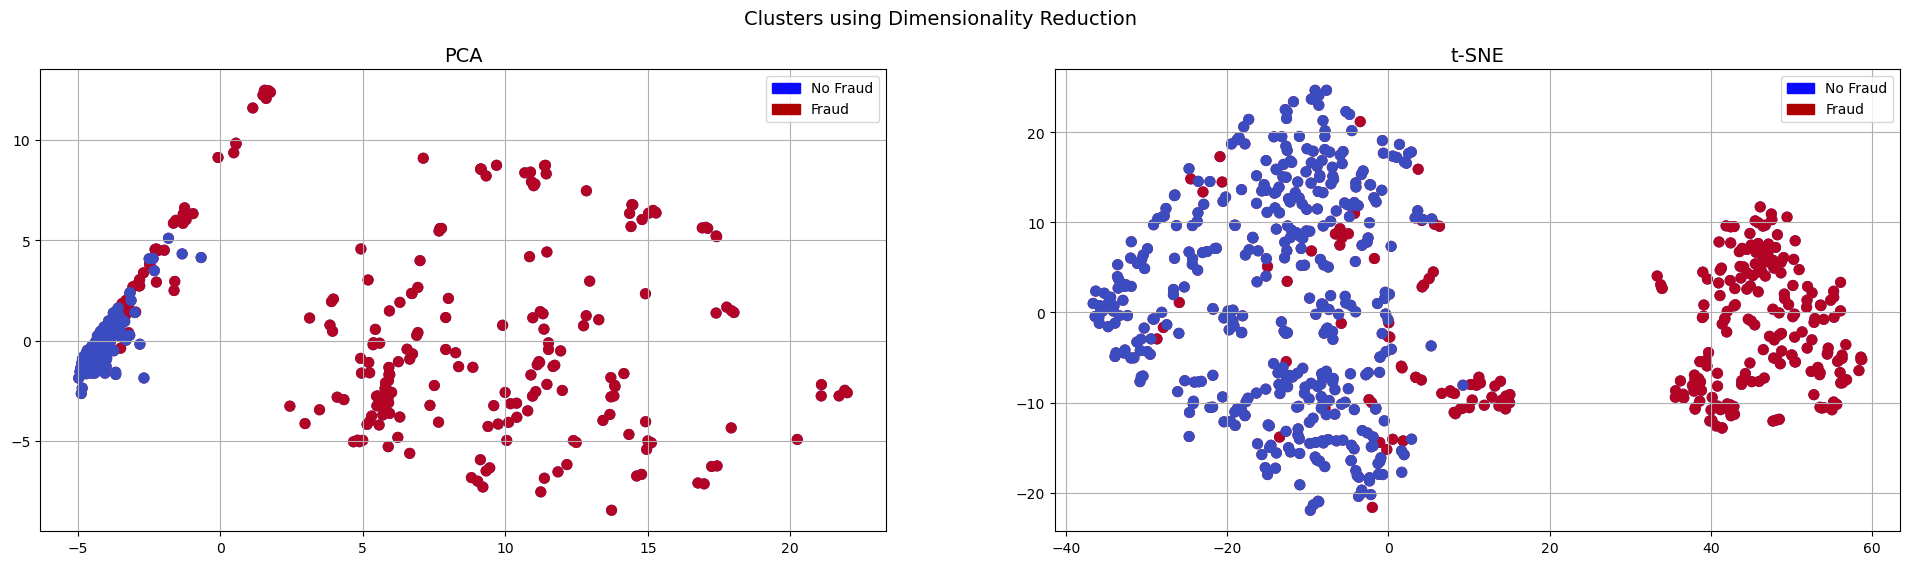

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

def display_scatter(ax, X, y, title):
  blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
  red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

  ax.scatter(X[:,0], X[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
  ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
  ax.set_title(title, fontsize=14)
  ax.grid(True)
  ax.legend(handles=[blue_patch, red_patch])


X = new_cc_train.drop('Class', axis=1)
y = new_cc_train['Class']

X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

display_scatter(ax1, X_pca, y, 'PCA')
display_scatter(ax2, X_tsne, y, 't-SNE')

#### PCA (Principal Component Analysis) Plot

Separation: The PCA plot shows a visible separation between fraud (red) and non-fraud (blue) transactions. Fraudulent transactions form a distinct cluster, indicating that PCA successfully reduces dimensionality while retaining variance that differentiates these classes.

Interpretation: This separation suggests that the data retains important variances that help distinguish fraud. PCA helps identify key components contributing to this distinction.

#### T-SNE (t-Distributed Stochastic Neighbor Embedding) Plot
Cluster Formation: The t-SNE plot highlights more distinct clusters of fraud and non-fraud transactions, with greater dispersion compared to PCA. This reflects t-SNE's capability to maintain local structure, making it excellent for observing fine-grained clustering.

Interpretation: The clear clustering in t-SNE indicates stronger separation and can reveal subtle patterns, suggesting that these clusters are intricately related to underlying differences in the features.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training.

In [42]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Data Split

1. First, we divided our dataset into two parts:

- Training Data: Comprising 80% of the dataset, this portion is used for training the models.

- Test Data: The remaining 20% of the dataset is reserved for evaluating the models later.
This approach ensures that the models learn from one subset of the data and are tested on another, allowing us to assess how well they generalize to unseen data.

### Models Used

2. We are testing five different classification algorithms to determine which one performs best:

- Logistic Regression: A fundamental algorithm that predicts the probability of an event (in this case, fraud or no fraud).

- K-Nearest Neighbors (KNN): This algorithm examines the "K" nearest data points and makes predictions based on the majority class.

- Support Vector Classifier (SVC): This method seeks to find a boundary that separates fraud and non-fraud data points as clearly as possible.

- Decision Tree: This approach splits the data into branches based on specific criteria, creating a tree-like structure that aids in decision-making.

- Random Forest: A collection of multiple decision trees that collaborate to improve the overall decision-making process.

### Model Training and Evaluation
For each classifier, the model is trained using the training data (X_train and y_train). Cross-validation is employed to evaluate performance. This technique divides the training data into five parts, using each part to test the model while training on the remaining four parts. The average performance across all five parts is then calculated.

Accuracy is computed to assess the model's effectiveness by comparing the predicted results to the actual outcomes.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

accuracies = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracies.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Accuracy: ", round(training_score.mean(), 2) * 100)

Classifiers:  LogisticRegression Accuracy:  94.0
Classifiers:  KNeighborsClassifier Accuracy:  94.0
Classifiers:  SVC Accuracy:  95.0
Classifiers:  DecisionTreeClassifier Accuracy:  91.0
Classifiers:  RandomForestClassifier Accuracy:  94.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

pca_accuracies = []

for key, classifier in pca_classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    pca_accuracies.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Accuracy: ", round(training_score.mean(), 2) * 100)

Classifiers:  LogisticRegression Accuracy:  94.0
Classifiers:  KNeighborsClassifier Accuracy:  94.0
Classifiers:  SVC Accuracy:  93.0
Classifiers:  DecisionTreeClassifier Accuracy:  92.0
Classifiers:  RandomForestClassifier Accuracy:  94.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

tsne_classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

tsne_accuracies = []

for key, classifier in tsne_classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    tsne_accuracies.append(round(training_score.mean(), 2) * 100)
    print("Classifiers: ", classifier.__class__.__name__, "Accuracy: ", round(training_score.mean(), 2) * 100)

Classifiers:  LogisticRegression Accuracy:  94.0
Classifiers:  KNeighborsClassifier Accuracy:  95.0
Classifiers:  SVC Accuracy:  93.0
Classifiers:  DecisionTreeClassifier Accuracy:  92.0
Classifiers:  RandomForestClassifier Accuracy:  94.0


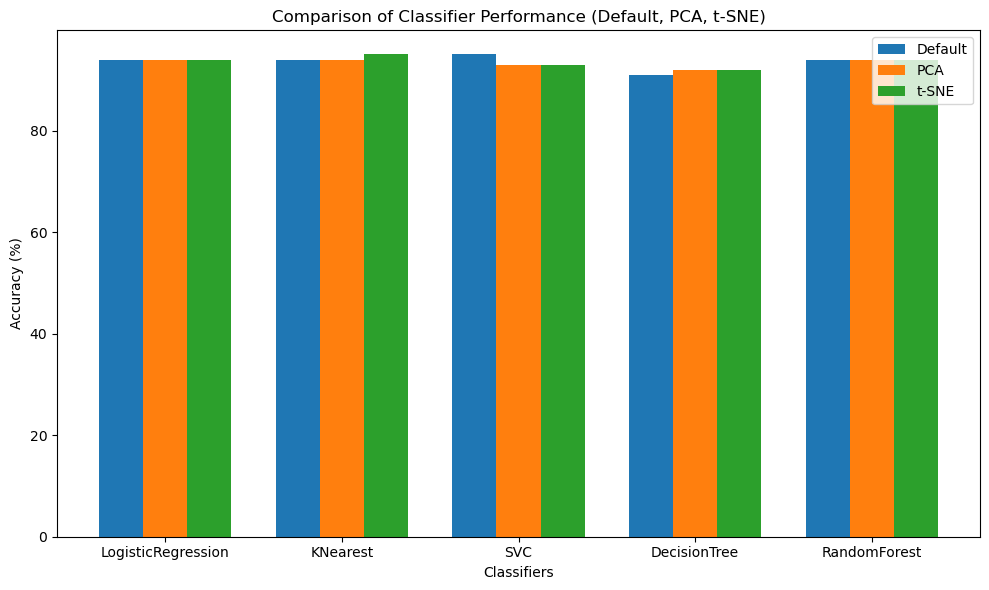

In [46]:
classifiers = ['LogisticRegression', 'KNearest', 'SVC', 'DecisionTree', 'RandomForest']

x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width, accuracies, width, label='Default')
bar2 = ax.bar(x, pca_accuracies, width, label='PCA')
bar3 = ax.bar(x + width, tsne_accuracies, width, label='t-SNE')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Classifier Performance (Default, PCA, t-SNE)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

plt.tight_layout()
plt.show()


### Interpretation of the Chart

In this analysis, we evaluated the performance of five classifiers—Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, and Random Forest—on the dataset. We compared their accuracy across three different setups:

Default (No Dimensionality Reduction): The classifiers were trained using all features without any reduction.
PCA (Principal Component Analysis): We reduced the data to two principal components to assess how this affected performance.
t-SNE: This technique reduces dimensions to explore the data structure in a lower-dimensional space.
Overall, dimensionality reduction (through PCA and t-SNE) had a minimal effect on most classifiers. KNN and Random Forest remained stable, maintaining similar accuracy, while Logistic Regression and SVC experienced slight declines in performance.

KNN and Logistic Regression emerged as the best performers, consistently achieving strong results across all setups. In contrast, the Decision Tree classifier exhibited the lowest performance compared to the other classifiers.

## Confusion Matrix

The matrix is a useful tool for evaluating the performance of a classification model.

Logistic Regression Accuracy: 0.92


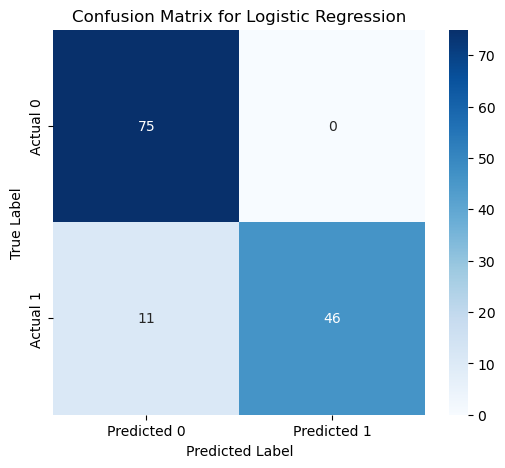

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_accuracy = 0


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

if accuracy_logistic >= best_accuracy:
    best_accuracy = accuracy_logistic

cm_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### The matrix for the Logistic Regression model provides valuable insights into its classification performance.

## Interpretation:

- True Positives (TP): 46 instances of class 1 (fraud) were correctly predicted as fraud.

- True Negatives (TN): 75 instances of class 0 (non-fraud) were correctly predicted as non-fraud.

- False Positives (FP): 0 instances were incorrectly predicted as fraud (no non-fraud transactions were misclassified as fraud).

- False Negatives (FN): 11 instances of fraud were incorrectly predicted as non-fraud.

- Have accuracy of of 92%

K-Nearest Neighbors Accuracy: 0.93


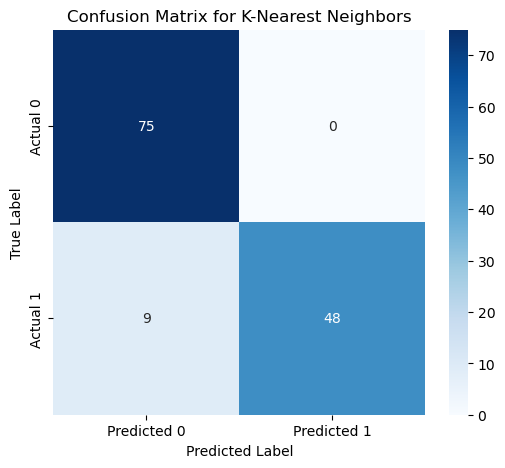

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")

if accuracy_knn >= best_accuracy:
    best_accuracy = accuracy_knn

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### The matrix for the K-Nearest Neigbors model provides valuable insights into its classification performance.

## Interpretation:

- True Positives (TP): 48 instances of class 1 (fraud) were correctly predicted as fraud.

- True Negatives (TN): 75 instances of class 0 (non-fraud) were correctly predicted as non-fraud.

- False Positives (FP): 0 instances were incorrectly predicted as fraud (no non-fraud transactions were misclassified as fraud).

- False Negatives (FN): 9 instances of fraud were incorrectly predicted as non-fraud.

- Have accuracy of of 93%

Support Vector Classifier Accuracy: 0.92


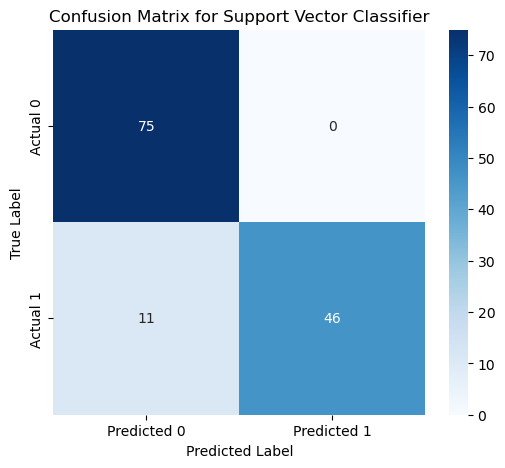

In [110]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Classifier Accuracy: {accuracy_svc:.2f}")

if accuracy_svc >= best_accuracy:
    best_accuracy = accuracy_svc

cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Support Vector Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Decision Tree Classifier Accuracy: 0.90


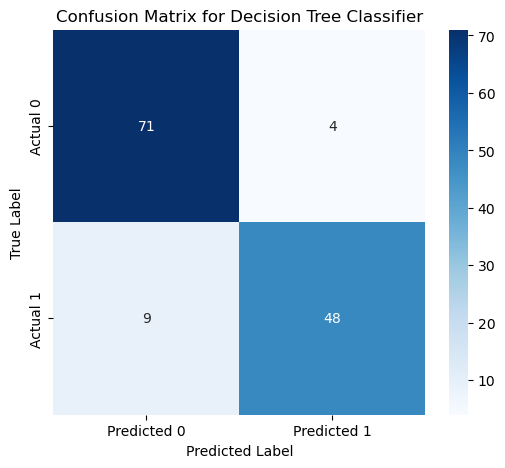

In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2f}")

if accuracy_dt >= best_accuracy:
    best_accuracy = accuracy_dt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### The matrix for the Decision Tree model provides valuable insights into its classification performance.

## Interpretation:

- True Positives (TP): 48 instances of class 1 (fraud) were correctly predicted as fraud.

- True Negatives (TN): 72 instances of class 0 (non-fraud) were correctly predicted as non-fraud.

- False Positives (FP): 3 instances were incorrectly predicted as fraud
    
- False Negatives (FN): 9 instances of fraud were incorrectly predicted as non-fraud.

- Have accuracy of of 91%

Random Forest Classifier Accuracy: 0.92


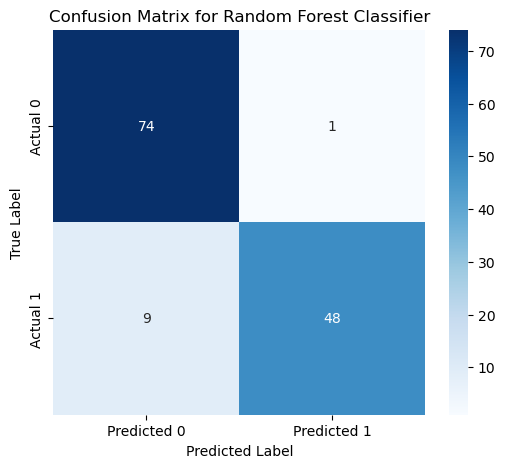

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

if accuracy_rf >= best_accuracy:
    best_accuracy = accuracy_rf

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### The matrix for the Random Forest model provides valuable insights into its classification performance.

## Interpretation:

- True Positives (TP): 47 instances of class 1 (fraud) were correctly predicted as fraud.

- True Negatives (TN): 74 instances of class 0 (non-fraud) were correctly predicted as non-fraud.

- False Positives (FP): 1 instances were incorrectly predicted as fraud.

- False Negatives (FN): 10 instances of fraud were incorrectly predicted as non-fraud.

- Have accuracy of of 92%

Test Accuracy of the Best Model: 92.00%

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       100
           1       1.00      0.76      0.86        50

    accuracy                           0.92       150
   macro avg       0.95      0.88      0.90       150
weighted avg       0.93      0.92      0.92       150



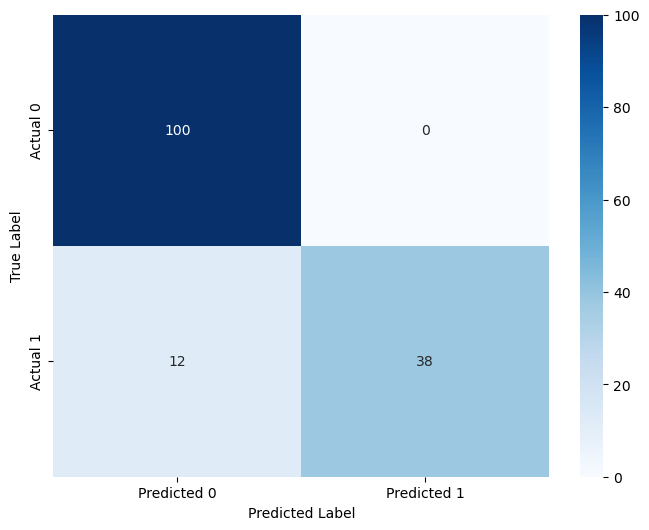

In [55]:
from sklearn.metrics import classification_report


creditcard_test_df = pd.read_csv("creditcard_test.csv")

X = creditcard_test_df.drop('Class', axis=1)
y = creditcard_test_df['Class']

X['Amount'] = min_max_scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X['Time'] = min_max_scaler.fit_transform(X['Time'].values.reshape(-1,1))


X = PCA(n_components=2, random_state=42).fit_transform(X.values)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X)

accuracy = accuracy_score(y, y_pred)
print("Test Accuracy of the Best Model: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()






After going through all the classification methods from Logistic Regression to Random Forest model, it directly outputs the best amoing those 5 models and show overall accuracy of the model which reach 92%. 

With Actual 1, Actual 0 indicating the actual result of fraud and non fraud and predicted 0 using the model for non fraud and predicted 1 for fraud.

## Interpretation:

- True Positives (TP): 38 instances of class 1 (fraud) were correctly predicted as fraud.

- True Negatives (TN): 100 instances of class 0 (non-fraud) were correctly predicted as non-fraud.

- False Positives (FP): 0 instances were incorrectly predicted as fraud.

- False Negatives (FN): 12 instances of fraud were incorrectly predicted as non-fraud.

- Have overall accuracy of of 92%

### Result of The Model 

#### Class 0 (Non-Fraud)

- Precision (0.89): Indicates that 89% of the instances predicted as class 0 (non-fraud) are correct. In other words, when the model predicts a transaction as non-fraud, it is accurate 89% of the time.

- Recall (1.00):This means that the model correctly identifies 100% of the actual class 0 instances. There are no false negatives, and every non-fraud instance is correctly classified.

- F1-Score (0.94):The harmonic mean of precision and recall, which provides a single measure of model accuracy. With a high score of 0.94, it indicates that the model balances precision and recall well for class 0.

- Support (100): The number of actual occurrences of class 0 in the dataset. In this case, there are 100 instances.

#### Class 1 (Fraud)

- Precision (1.00): Indicates that 100% of the instances predicted as class 1 (fraud) are correct. This means all transactions classified as fraud are genuine fraud cases.

- Recall (0.76): The model identifies 76% of the actual class 1 instances. This implies that 24% of the actual fraud cases are missed (false negatives).

- F1-Score (0.86): This score represents a balance between precision and recall for class 1. At 0.86, it indicates a good balance but suggests there is some room for improvement, particularly in recall.

- Support (50): The number of actual occurrences of class 1 in the dataset. In this case, there are 50 instances of fraud.

##### Overall Interpretation
The model performs well for class 0 (non-fraud), accurately predicting it with high precision and recall.
For class 1 (fraud), while the precision is perfect (100%), the recall indicates that the model misses some actual fraud cases. 

### Module 5: Summary
Summarize your findings and draw conclusions.

### Module 1: Data Exploration

Module 1 focused on data preprocessing to prepare the dataset for model training. The initial dataset contained numerous null values, which were imputed using the mean of each respective column. Addressing the significant class imbalance—a heavily skewed distribution favoring non-fraudulent transactions—was crucial. The dataset was resampled to achieve a 50:50 ratio between fraudulent and non-fraudulent transactions, balancing the 442 fraudulent instances with an equivalent number of non-fraudulent instances. This resampling mitigated potential bias during model training for both classes. Furthermore, to prevent skewed results from differing scales, the 'Amount' and 'Time' features were scaled. Finally, outlier values were removed using the Interquartile Range (IQR) method. These preprocessing steps ensured a cleaner, more balanced, and appropriately scaled dataset for subsequent modeling phases.

### Module 2: Data Visualization

To guide subsequent visualizations, a correlation matrix (heatmap) identified key features associated with fraudulent transactions ("Class").  Features V2, V11, V4, and V10 showed strong positive correlations, suggesting their predictive potential for fraud. Conversely, V3, V5, V6, V7, V9, V10, V12, V14, and V17 displayed negative correlations, indicating a lower likelihood of fraud at higher values.  Focusing on these features, the first visualization explored their distributions.  V4 and V10 exhibited skewed distributions, suggesting higher values were associated with fraudulent transactions, while V17 showed a more balanced distribution.  A second visualization demonstrated the exclusion of the "Time" feature due to high overlap between fraudulent and non-fraudulent transaction times, hindering interpretability. Finally, a third visualization provided additional insights into the characteristics of fraudulent transactions.


### Module 3: Dimension Reduction
Dimensionality reduction was applied to simplify the complex dataset and improve model performance.  Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) were used, reducing the dataset to two principal components in both cases. The PCA plot revealed a clear separation between fraudulent (red) and non-fraudulent (blue) transactions, with fraudulent transactions forming a distinct cluster. This demonstrates PCA's effectiveness in dimensionality reduction while preserving variance that distinguishes these classes.  In contrast, the t-SNE plot showed more distinct clusters with greater dispersion, reflecting t-SNE's ability to preserve local structure and reveal fine-grained clustering patterns.  A comparative scatter plot analysis ultimately determined which dimensionality reduction technique was better suited for this specific problem, clearly showing improved clustering between fraudulent and non-fraudulent transactions.

### Module 4: Classification

This part evaluated five classification algorithms—Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, and Random Forest—for fraud detection.  Each model was trained using a training dataset (X_train, y_train) and evaluated using 5-fold cross-validation. This process involved partitioning the training data into five subsets, iteratively training the model on four subsets and testing on the remaining subset.  The average performance across these five iterations provided a robust estimate of model performance. A comparative bar chart visualized the performance of each classifier across three scenarios: using the original dataset, data reduced with Principal Component Analysis (PCA), and data reduced with t-SNE.  KNN and Logistic Regression consistently demonstrated superior performance. A confusion matrix further detailed the model's performance on the training data.  Finally, the best-performing models were evaluated on a held-out test dataset (X_test, y_test), achieving an overall accuracy of 92%. 

